# Principal Component Analysis (PCA)
## The method above is unsupervised method that is often used to reduce the dimension of dataset.
## It can also be used to visualize high-dimensional dataset

In [21]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import mglearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

In [22]:
cancer = load_breast_cancer()

In [23]:
cancer.data.shape #it has 569 rows with 30 features each 

(569, 30)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=2)

In [25]:
pca = PCA(n_components = 2).fit(X_train) # we make the object that will have 2 features and use X_train (not needed y_train)

In [26]:
X_scaled_pca = pca.transform(X_train)

Text(0.5, 1.0, 'Using PCA to reduce dimension of cancer dataset and visualize it')

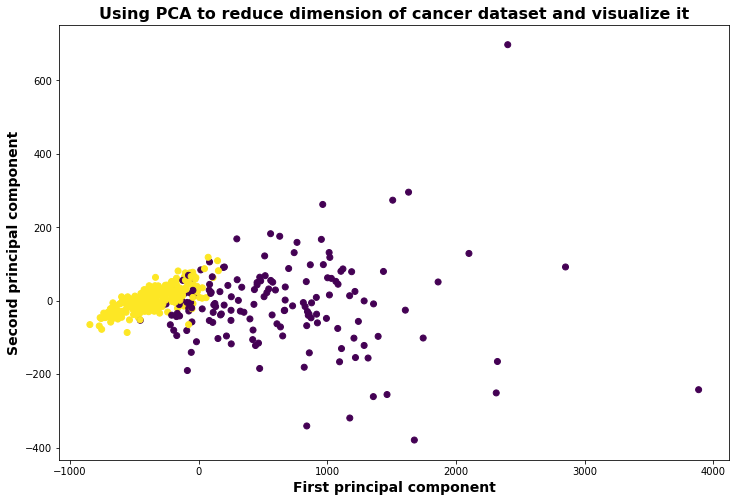

In [27]:
plt.figure(figsize= (12,8))
plt.scatter(x = X_scaled_pca[:,0], y = X_scaled_pca[:,1], c = y_train)
plt.xlabel("First principal component", fontsize = 14, fontweight = "bold")
plt.ylabel("Second principal component", fontsize = 14, fontweight = "bold")
plt.title("Using PCA to reduce dimension of cancer dataset and visualize it", fontsize = 16, fontweight = "bold")

## Feature extraction using PCA

In [28]:
from sklearn.datasets import fetch_lfw_people

In [29]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [30]:
people.data

array([[0.00261438, 0.00130719, 0.        , ..., 0.07843138, 0.08235294,
        0.11764706],
       [0.        , 0.        , 0.        , ..., 0.09150327, 0.07973856,
        0.06928105],
       [0.        , 0.        , 0.        , ..., 0.05882353, 0.09150327,
        0.07450981],
       ...,
       [0.        , 0.00392157, 0.01568628, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00130719, 0.00261438, ..., 0.18300654, 0.15816994,
        0.1254902 ]], dtype=float32)

In [31]:
image_shape = people.images[0].shape # dimension of image = 87x65 pixels

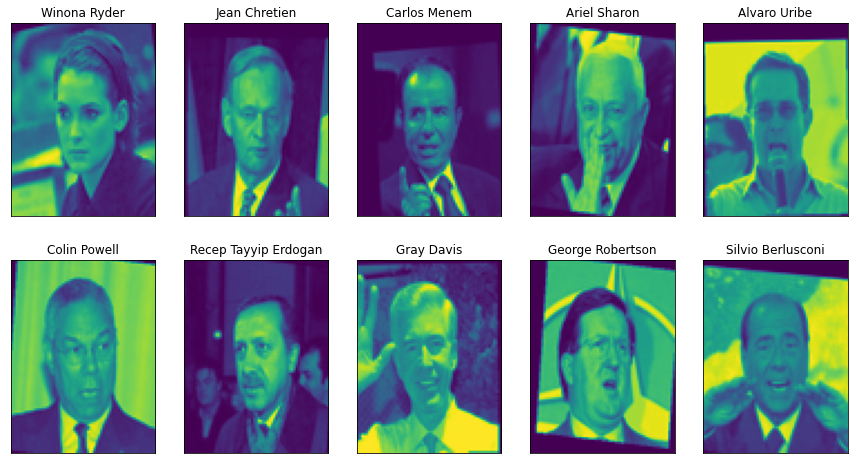

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize = (15,8),subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [33]:
#for the training, let us take up to 50 images of each person
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.


C:\Users\Uzytkownik\AppData\Local\Temp\ipykernel_7840\1196437451.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [34]:
X_people

array([[1.0252467e-05, 5.1262336e-06, 0.0000000e+00, ..., 3.0757402e-04,
        3.2295272e-04, 4.6136102e-04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.5883635e-04,
        3.1270026e-04, 2.7169040e-04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.3068051e-04,
        3.5883635e-04, 2.9219533e-04],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.6396258e-04, 3.6908881e-04, 3.6908881e-04, ..., 2.5631170e-04,
        0.0000000e+00, 1.0252467e-05],
       [3.4345765e-04, 3.5883635e-04, 1.8967064e-04, ..., 3.4345765e-04,
        3.7421504e-04, 3.8446751e-04]], dtype=float32)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify= y_people, random_state=0)

In [37]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

In [38]:
print(f"Score in face recognition: {knn.score(X_test, y_test)*100} %")

Score in face recognition: 13.953488372093023 %


In [39]:
"""This is where PCA comes in. Computing distances in the original pixel space is quite
a bad way to measure similarity between faces. When using a pixel representation to
compare two images, we compare the grayscale value of each individual pixel to the
value of the pixel in the corresponding position in the other image. This representa‐
tion is quite different from how humans would interpret the image of a face, and it is
hard to capture the facial features using this raw representation. For example, using
pixel distances means that shifting a face by one pixel to the right corresponds to a
drastic change, with a completely different representation. We hope that using distan‐
ces along principal components can improve our accuracy. Here, we enable the
whitening option of PCA, which rescales the principal components to have the same
scale"""

'This is where PCA comes in. Computing distances in the original pixel space is quite\na bad way to measure similarity between faces. When using a pixel representation to\ncompare two images, we compare the grayscale value of each individual pixel to the\nvalue of the pixel in the corresponding position in the other image. This representa‐\ntion is quite different from how humans would interpret the image of a face, and it is\nhard to capture the facial features using this raw representation. For example, using\npixel distances means that shifting a face by one pixel to the right corresponds to a\ndrastic change, with a completely different representation. We hope that using distan‐\nces along principal components can improve our accuracy. Here, we enable the\nwhitening option of PCA, which rescales the principal components to have the same\nscale'

In [40]:
pca = PCA(n_components= 100, whiten=True,random_state=0).fit(X_train)

In [41]:
X_train_scaled = pca.transform(X_train)
X_test_scaled = pca.transform(X_test)

In [42]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train_scaled, y_train)

In [43]:
print(f"Score in face recognition after applying PCA: {knn.score(X_test_scaled, y_test)*100} %")

Score in face recognition after applying PCA: 15.11627906976744 %


In [44]:
#page 165 

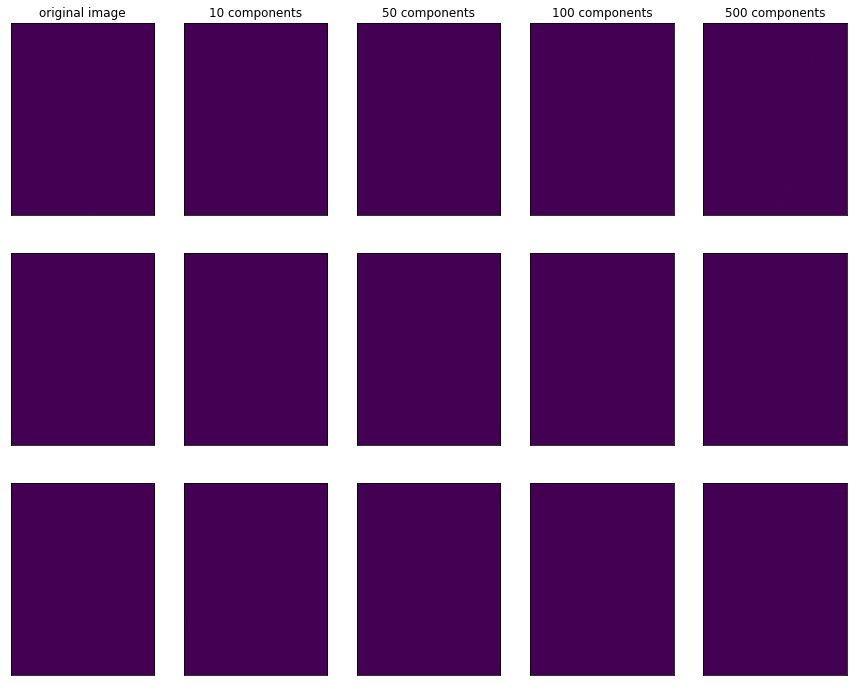

In [122]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

# NMF - Non-Negative Matrix Factorization - it works similar to PCA

# Manifold learning with t-SNE
 - main goal is to find a two-dimendional representation of the data that preserves the distances between points as best as possible

In [46]:
from sklearn.datasets import load_digits

In [47]:
digits = load_digits()

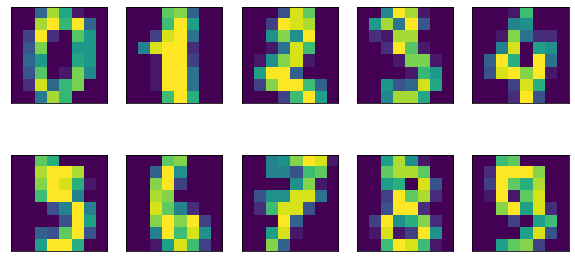

In [48]:
fig, axes = plt.subplots(2,5, figsize = (10,5), subplot_kw = {"xticks":(), "yticks":()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [49]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

# 1. Applaying PCA to those digits

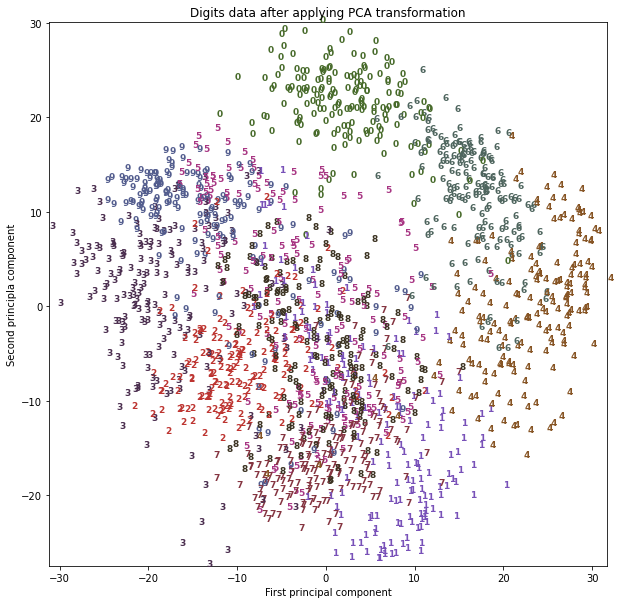

In [50]:
# build a PCA model
pca = PCA(n_components=2).fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
# plot the two dimensional transformed digits data 
plt.figure(figsize = (10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:, 1].max())
plt.title("Digits data after applying PCA transformation")
plt.xlabel("First principal component")
plt.ylabel("Second principla component")

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
 "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

for i in range(len(digits.data)):
    # actually plot digits as text instead of scatter diagram
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]), 
             color = colors[digits.target[i]], 
             fontdict = {"weight": "bold", "size":9})

# 2. Applying t-SNE to those digits

c:\users\uzytkownik\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\uzytkownik\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


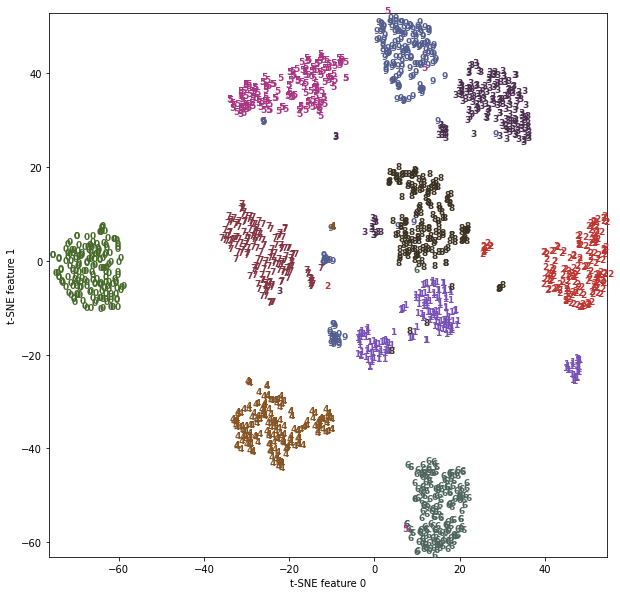

In [51]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

# use fit_transform instead of fit, as TSNE does not have transform method
digits_tsne = tsne.fit_transform(digits.data)

# plot the figure 
plt.figure(figsize = (10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max())
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max())
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict = {"weight": "bold", "size": 9})


In [52]:
# clustering - page 182

# Clustering - dividing the points in the dataset

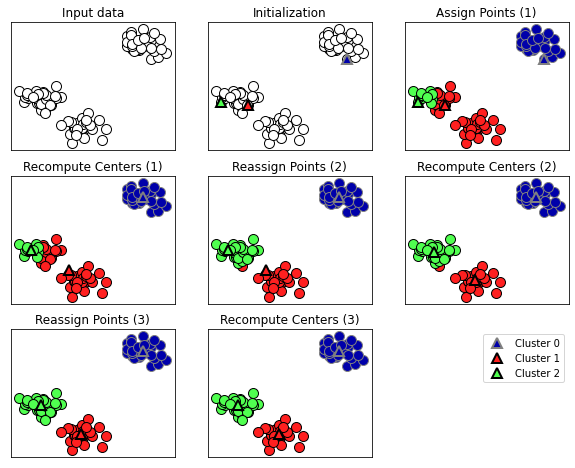

In [53]:
mglearn.plots.plot_kmeans_algorithm()

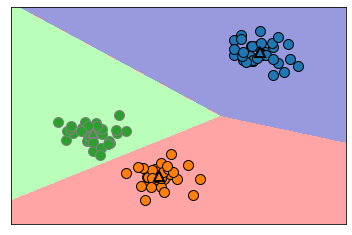

In [54]:
mglearn.plots.plot_kmeans_boundaries()

In [55]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [56]:
# Generate two-dimensional dataset
X,y = make_blobs(random_state=1)

In [57]:
X[:10]

array([[ -0.79415228,   2.10495117],
       [ -9.15155186,  -4.81286449],
       [-11.44182631,  -4.45781441],
       [ -9.76761777,  -3.19133737],
       [ -4.53655648,  -8.40186288],
       [ -6.26302115,  -8.10666081],
       [ -6.38481234,  -8.4730297 ],
       [ -9.20490564,  -4.57687928],
       [ -2.76017908,   5.55121358],
       [ -1.17104176,   4.33091816]])

In [58]:
y[:10]

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0])

In [59]:
# build the clustering model
kmeans = KMeans(n_clusters=3) #we define the number of clusters
kmeans.fit(X)

KMeans(n_clusters=3)

In [60]:
kmeans.labels_

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0])

In [61]:
kmeans.predict(X) #the same as kmeans.labels_

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0])

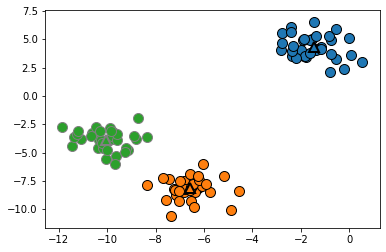

In [62]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers = "o")
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2], markers = "^",
                        markeredgewidth=2)

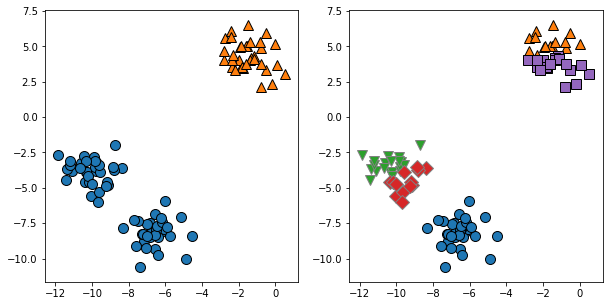

In [63]:
#we can use different value of cluster centers

fig, axes = plt.subplots(1,2, figsize = (10,5))

# using two cluster centers
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
mglearn.discrete_scatter(X[:,0],X[:,1], kmeans.labels_, ax = axes[0])

#using five cluster centers
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
mglearn.discrete_scatter(X[:,0],X[:,1], kmeans.labels_, ax = axes[1])


Text(0, 0.5, 'Feature 1')

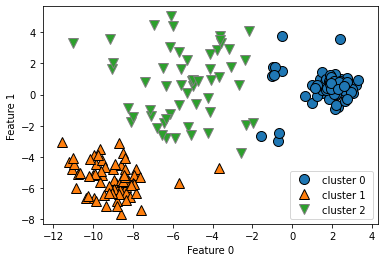

In [64]:
X_varied, y_varied = make_blobs(n_samples=200,
                               cluster_std=[1.0,2.5,0.5],
                               random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0],X_varied[:,1], y_pred)
plt.legend(["cluster 0 ", "cluster 1", "cluster 2"], loc = "best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1 ')

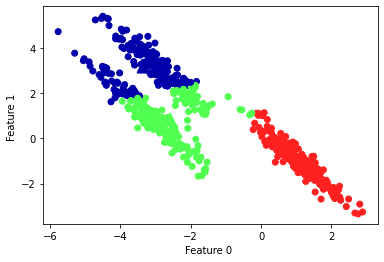

In [65]:
#generate the random data
X,y = make_blobs(random_state=170, n_samples = 600)
rng = np.random.RandomState(74)

#transform the data to be stretched
transformation = rng.normal(size = (2,2))
X = np.dot(X, transformation)

#cluster the data into 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#plot the cluster 
plt.scatter(X[:,0],X[:,1], c= y_pred, cmap = mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = "^", c = [0,1,2], s =100, linewidth= 2, 
            cmap = mglearn.cm3)
plt.xlabel("Feature 0 ")
plt.ylabel("Feature 1 ")

In [66]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise = 0.05, random_state=0)

In [67]:
# cluster the data in two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

y_pred = kmeans.predict(X)

Text(0, 0.5, 'Feature 1')

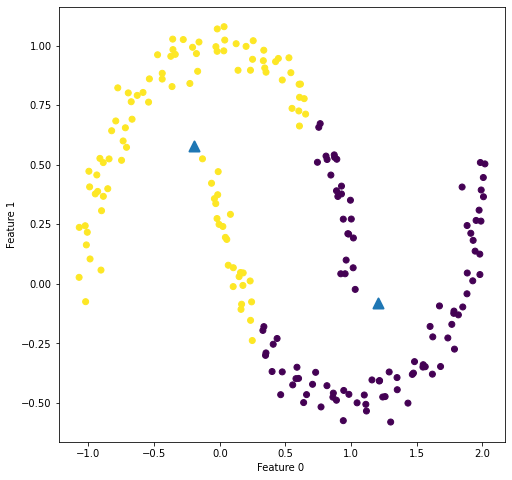

In [68]:
plt.figure(figsize = (8,8))
plt.scatter(X[:,0],X[:,1], c = y_pred)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = "^", s = 100,linewidth = 2)
plt.xlabel("Feature 0 ")
plt.ylabel("Feature 1")

# PCA, NMF, k-means comparison

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify= y_people, random_state=0)

# --- NMF
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

# --- PCA
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

# --- Kmeans
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

# 
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

c:\users\uzytkownik\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'nmf')

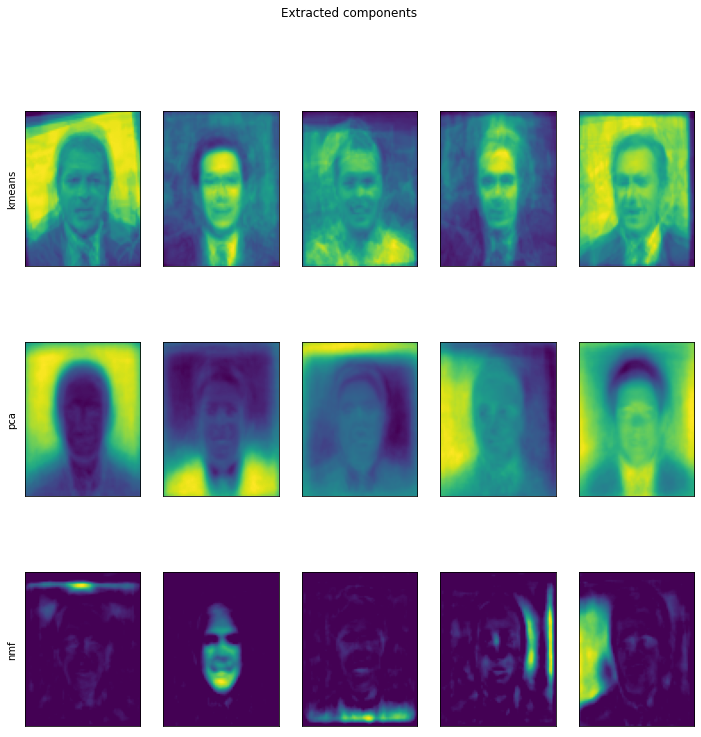

In [70]:
fig, axes = plt.subplots(3,5, figsize = (12,12),
                        subplot_kw = {"xticks":(), "yticks": ()})
fig.suptitle('Extracted components')

for ax, comp_kmeans, comp_pca, comp_nmf in zip(
                                                axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap = "viridis")
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

Text(0, 0.5, 'nmf')

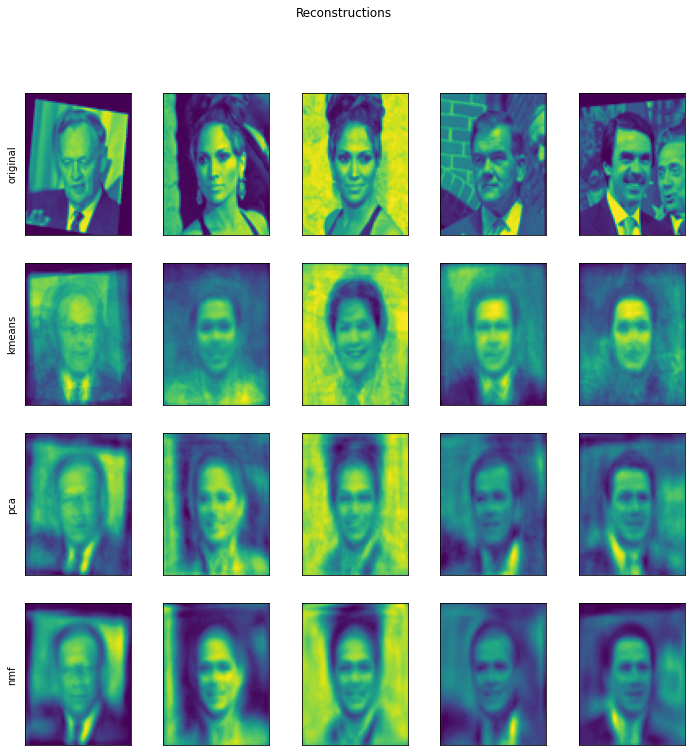

In [71]:
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
 figsize=(12, 12))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
                                         axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
                                         X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

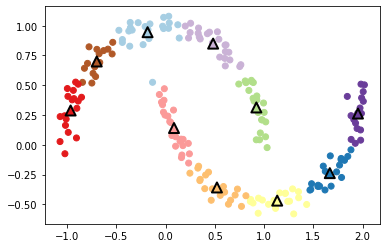

In [72]:
X, y = make_moons(n_samples=200, noise = 0.05, random_state=0)
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0],X[:,1], c = y_pred, marker = "o", cmap = "Paired")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker = "^", s = 100, linewidth = 2, 
           cmap = "Paired", c = range(kmeans.n_clusters),
           edgecolors= "black")

In [73]:
y_pred

array([2, 1, 3, 4, 1, 1, 2, 8, 2, 8, 0, 5, 1, 8, 9, 2, 6, 5, 6, 9, 7, 8,
       6, 8, 0, 3, 1, 7, 3, 0, 2, 0, 8, 3, 6, 7, 5, 2, 9, 3, 5, 0, 6, 3,
       1, 0, 2, 9, 3, 8, 9, 5, 7, 4, 8, 6, 6, 8, 6, 0, 5, 4, 1, 2, 8, 4,
       0, 1, 0, 4, 5, 4, 5, 0, 5, 4, 3, 2, 6, 5, 7, 0, 5, 7, 3, 0, 2, 0,
       5, 7, 6, 2, 7, 9, 7, 1, 1, 5, 4, 3, 8, 7, 0, 2, 4, 3, 4, 0, 1, 6,
       9, 0, 0, 4, 2, 8, 6, 7, 5, 2, 2, 9, 3, 0, 3, 9, 2, 3, 8, 7, 2, 9,
       4, 3, 8, 1, 8, 4, 7, 2, 3, 3, 6, 0, 0, 2, 3, 8, 6, 3, 5, 1, 2, 6,
       5, 0, 8, 5, 6, 6, 3, 8, 6, 1, 5, 1, 6, 5, 1, 8, 6, 4, 4, 9, 3, 8,
       7, 9, 9, 6, 1, 4, 7, 1, 7, 6, 0, 5, 4, 9, 4, 6, 2, 2, 3, 9, 7, 3,
       0, 1])

In [74]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))


Distance feature shape: (200, 10)
Distance features:
[[1.08562445 1.14060718 0.23340263 ... 1.16555129 1.04013486 1.52608012]
 [2.23627308 0.149581   0.98271691 ... 0.72381874 0.4935202  2.55646013]
 [0.69081001 1.76451208 0.94399739 ... 1.97438819 1.37288227 0.80023234]
 ...
 [1.01784792 1.50934512 0.81205971 ... 1.79761869 1.06309851 1.12442758]
 [0.31322743 1.98349977 1.05774337 ... 1.97508335 1.78881986 0.87902968]
 [2.14966679 0.04819401 0.88166689 ... 0.5877911  0.54671574 2.4971347 ]]


# Agglomerative Clustering - collection of clustering algorithms

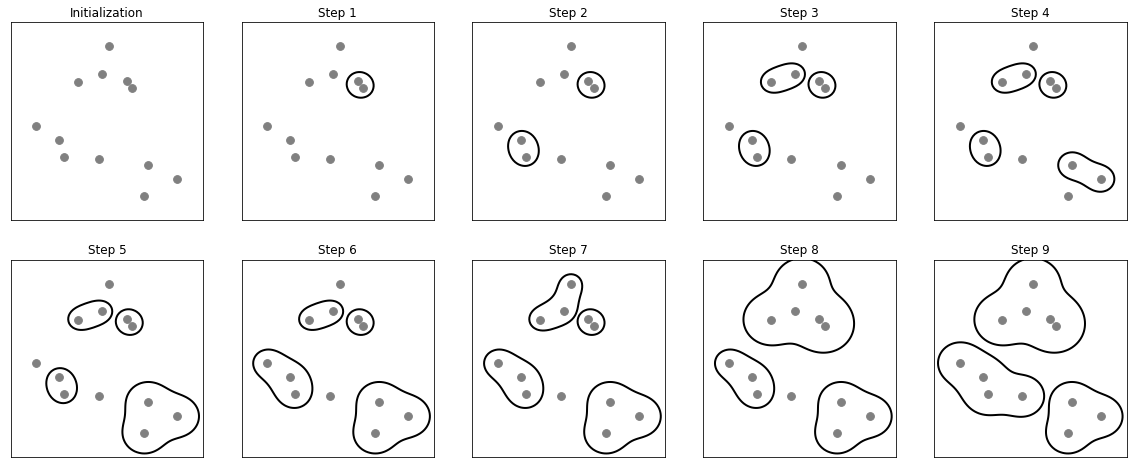

In [75]:
mglearn.plots.plot_agglomerative_algorithm()

In [76]:
from sklearn.cluster import AgglomerativeClustering

Text(0, 0.5, 'Feature 1 ')

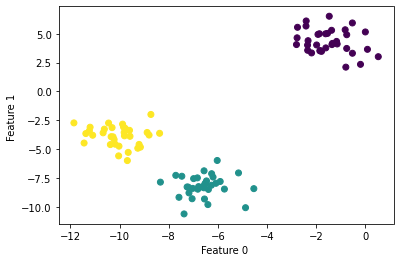

In [77]:
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c = assignment)
plt.xlabel("Feature 0 ")
plt.ylabel("Feature 1 ")

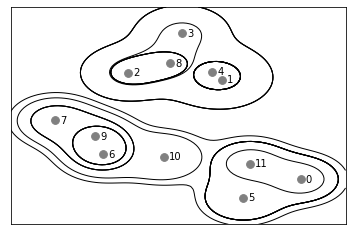

In [78]:
mglearn.plots.plot_agglomerative()

In [79]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples = 12)

Text(0, 0.5, 'Cluster distance')

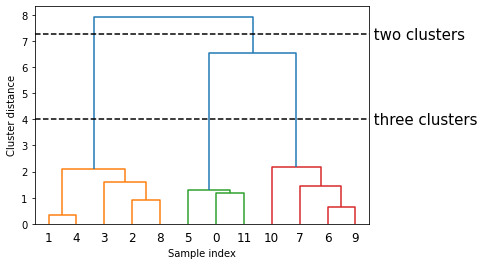

In [80]:
linkage_array = ward(X)
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")


In [81]:
#page 201

# DBSCAN - another algorithm for clustering 
 - it does not require to set the number of clusters

In [82]:
from sklearn.cluster import DBSCAN
X,y = make_blobs(random_state=0, n_samples = 12)

In [83]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)

In [84]:
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


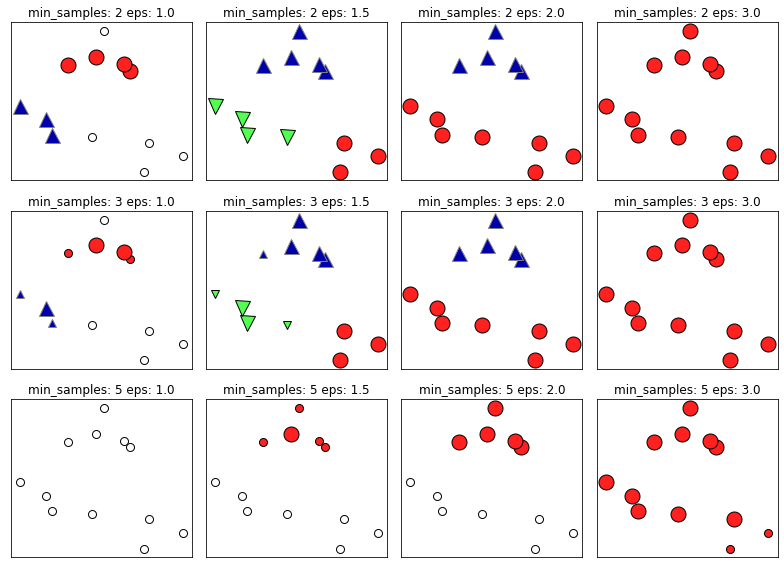

In [85]:
mglearn.plots.plot_dbscan()

In [86]:
from sklearn.preprocessing import StandardScaler


Text(0.5, 1.0, 'eps = 0.5 (default) for DBSCAN algorithm without explicitly setting the number of clusters')

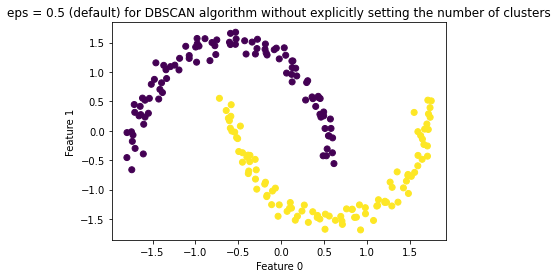

In [87]:
X, y = make_moons(n_samples=200, noise = 0.05, random_state=0)

# rescale the data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#build the model
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

#plot the cluster assignments
plt.scatter(X_scaled[:,0],X_scaled[:,1], c = clusters)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title('eps = 0.5 (default) for DBSCAN algorithm without explicitly setting the number of clusters')

In [88]:
# We can evaluate the algorithms with ARI (Adjusted Rand Index) or NMI (Normalized Mutual Information)

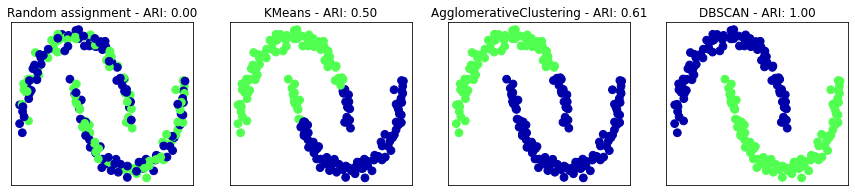

In [89]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)


# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
 subplot_kw={'xticks': (), 'yticks': ()})


# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
 DBSCAN()]


# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))


# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
 cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
 adjusted_rand_score(y, random_clusters)))


for ax, algorithm in zip(axes[1:], algorithms):
     # plot the cluster assignments and cluster centers
     clusters = algorithm.fit_predict(X_scaled)
     ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
     cmap=mglearn.cm3, s=60)
     ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
     adjusted_rand_score(y, clusters)))

# Applying k-means, DBSCAN, agglomerative clustering to the Labaled Faces dataset

In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten = True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [91]:
# --- applying DBSCAN with default parameters
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print(f"unique labels = {np.unique(labels)}")

unique labels = [-1]


In [92]:
# it means that all data was labeled as "noise"

In [93]:
# we can either make eps higher toxpand the neighborhood of 
# each point and set min_samples lowe to consider smaller groups of points as cluster

In [94]:
dbscan = DBSCAN(min_samples= 3)
labels = dbscan.fit_predict(X_pca)

In [95]:
labels

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [96]:
np.unique(labels) #again noise

array([-1], dtype=int64)

In [97]:
#lets change the value of eps
dbscan = DBSCAN(eps=15)
labels = dbscan.fit_predict(X_pca)
np.unique(labels)

array([-1,  0], dtype=int64)

In [98]:
#we got a single cluster and noise points

In [99]:
#lets check the number of noise points 
np.bincount(labels +1)

array([  12, 2051], dtype=int64)

In [111]:
noise = X_people[labels==-1]

In [113]:
noise.shape

(12, 5655)

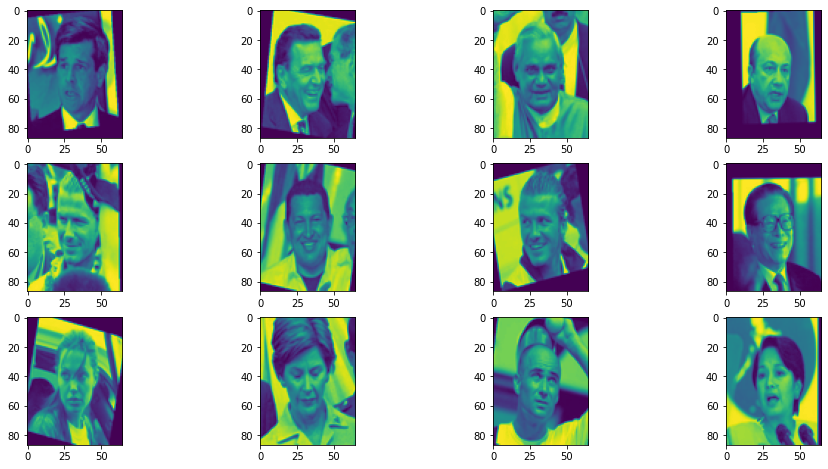

In [121]:
fig, axes = plt.subplots(3,4, figsize = (16,8))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape))


In [103]:
type(people.images)

numpy.ndarray

In [104]:
people.images.shape

(3023, 87, 65)

In [106]:
people.data.shape

(3023, 5655)

In [108]:
X_people.shape

(2063, 5655)

In [126]:
#lets apply different values of eps

for eps in [1,3,5,7,9,13]:
    print("\neps={}".format(eps))

    
    dbscan = DBSCAN(eps = eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Clusters present: {}".format(np.unique(labels)))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))

    


eps=1
Clusters present: [-1]
Cluster sizes: [2063]

eps=3
Clusters present: [-1]
Cluster sizes: [2063]

eps=5
Clusters present: [-1  0]
Cluster sizes: [2060    3]

eps=7
Clusters present: [-1  0]
Cluster sizes: [1912  151]

eps=9
Clusters present: [-1  0]
Cluster sizes: [1302  761]

eps=13
Clusters present: [-1  0]
Cluster sizes: [  96 1967]
